
<b> Hello, Ameer! </b>

My name is Alex and I'm glad to be your reviewr for this project today.

At the first mistake, I'll only mark it. I'll give you the opportunity to find and fix it yourself. We're getting ready for real work, where your TeamLead/Senior colleague will do the same. If there are any difficulties, of course, I'll add details.

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

Also I'd suggest numbering iterations of comments, for example v1 - for first review, v2 - for second and so on, to make it easier to track changes in the project.

OK, now let's go!

# What determines the success of a video-game?
I work for the online store ***Ice***, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

**The purpose of the project** is to determine the factors that may contribute to the success of a certain video-game. By doing that, we can then plan the upcoming campaigns and forcast their sales based on the data from the previous campaigns.

**Plan of Work:**

* We are going to start by preprocessing the data, looking for missing values, duplicates and any problematic issues that we may find.
* After the initial inspection, we are going to treat the problematic data, whether it is missing data or it is duplicates.
* Once we are done with problematic data, we continue forward and start sorting the data, keeping the data that we need and getting rid of the useless data, if there's any.
* Once we're done with data preprocessing, and we have a clean dataset to work with, we can then start analyzing the data using the methods that pandas lib. offers and display the results using graphs and histograms.
* One step before finishing, we test several hypotheses that'll help us determine the factors that we're looking for more accurately.
* Finally, draw general conclusions and sum up.

## Initialization
We'll start by reading the data, have a look at it and study the general information:

First we load the needed libraries and load our dataset into a dataframe

### Loading and exploring data

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Good start! With a detailed description, we will not miss a single step!
</div>

In [1]:
# Loading all the needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

# To avoid warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Great idea! We won't be disturbed by warnings.
</div>

In [2]:
game_data = pd.read_csv('/datasets/games.csv')
game_data.info()
game_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Good start!
</div>

### Fixing data types
By simply looking at the dataframe that we have above, we can notice a few issues:
1. Alot of missing values
2. Incorrect data types (for instance, user_score is a string)
3. Column names (Not as critical, but it is easier to have them all in lower-case)

Lets start by treating the least critical issue, column names:

In [3]:
# converting column names to lower-case letters.
game_data.columns = game_data.columns.str.lower()
game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Well done!
</div>

That was an easy fix, Lets move on!

Now we can address incorrect data types, looking at the dataframe **info()** method results, we can see that **user_score** column is in string form when it should be a numeric value. Lets have a look at it:

In [4]:
# Checking what values does it include
game_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
1.1       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [5]:
# Converting user_score from string to a numeric value (this will lead to some missing values)
game_data['user_score'] = pd.to_numeric(game_data['user_score'],errors='coerce')
game_data['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

We have treated this issue, now we can move on onto dealing with missing values.

We initially had alot of missing values, and by converting the **tdb** values from string to float in the **user_score** column, that led to even more missing values that we have to deal with. Therefore, we are going to perform a deeper inspection into the rest of the columns to make sure that all the values are correct and then start treating the missing values that we have.

We'll start by checking that the **year_of_release** column is proper:

In [6]:
# Checking the data of year_of_release column
game_data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Everything looks great on the **year_of_release** column.
**Next** we move on to the **genre** column:

In [7]:
# Checking the genre column
game_data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

The data in **genre** looks great as well!
Lets quickly move to the **rating** column:

In [8]:
# Checking the rating column
game_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In **rating** everything looks fine as well. Lets have one last check, to see how many platforms we are working with.
**Next** we check the **platform** column:

In [9]:
# Checking the platform column
game_data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

We don't see any duplicate or suspectable values in the **platform** column.

We've dealt with most of the values that could've been problematic. We have one thing left, to assure that we don't have any duplicates later, and it is to convert the video-game names into lower-case.

In [10]:
# converting the video-games name column to lower-case
game_data['name'] = game_data['name'].str.lower()
game_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Treating missing values
We're officially done with our first inspection, now we can start treating missing values and duplicates.

We'll start with **missing values**:

In [11]:
# lets check how many missing values we have
print(game_data.isna().sum())
#print(game_data.isna().sum()/len(game_data))

print('\nPercentages:')
for col in game_data:
    print('{} is {:2%}'.format(col, game_data[col].isna().sum()/len(game_data)))


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Percentages:
name is 0.011965%
platform is 0.000000%
year_of_release is 1.609333%
genre is 0.011965%
na_sales is 0.000000%
eu_sales is 0.000000%
jp_sales is 0.000000%
other_sales is 0.000000%
critic_score is 51.319174%
user_score is 54.591684%
rating is 40.478612%


We can see that we have a couple missing values on **name** and **genre** columns, a bit more in **year_of_release**, those are not a problem. The problem lies on the last 3 columns, with thousands of missing values.

Since the percentages of missing values in **name**, **year_of_release** and **genre** are very low that we can drop the rows with missing values without really affecting the dataframe greatly.

As for the other 3 columns, **critic_score**, **user_score** and **rating**, we have different plans.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3</b> 
    
Right!
</div>

In [12]:
# checking nulls in name column
game_data[game_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We don't have a way to retrieve the missing values in those two rows (notice that the same rows that has no **name** are also the rows that has no **genre**) and they belong to the **platform** *GEN*, with 29 rows of data, it is not representative enough. Therefore, we decided to delete these 2 rows, along with the whole platform data (since we'll be doing this later on):

In [13]:
# removing the GEN platform from the dataframe
game_data = game_data[game_data['platform'] != 'GEN']
game_data.query('platform == "GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Next** we have to address the **year_of_release** missing values, as we said above, there's a very small percentage of missing values in this column, therefore we can drop them without really affected our dataset greatly:

In [14]:
# checking missing values in year_of_release
game_data[game_data['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,lego indiana jones: the original adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


To fill the missing values here we have several options:
1. Check for each game year of release manually on google (Most accurate)
2. Try to determine the game's year of release by the game's name (For instance, fifa soccer 2004 is obviously released in 2004 or late 2003)
3. Drop all of these rows.

We don't really have much missing values in **year_of_release** so lets just go ahead and drop them all:

In [15]:
# filling missing values of year_of_release
game_data = game_data[~game_data['year_of_release'].isna()]

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment v1</b> 
    
Filling in missing values with averages is great practice and we will do this again in future projects!
    
In this case, in first solution, we could fill in the missing values with a stub. It was only necessary to filter the data with stubs during data analysis so that stubs would not introduce an error into the result.

The second possible solution was to do nothing with the missing values and also filter them during the analysis. At this point, I just wanted to warn you about a possible problem in data analysis with the stub approach. All changes - filtering - we would need to make at the stage of using data when building graphs and testing hypotheses.
    
Could we choose one of the two approaches? stub with filtering or just filtering out missing values?
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Makes sense, glad to learn about this! Thanks for the tip, Alex. 
    
    (CORRECTED)
</div>
    
<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> 
    
Could we convert the number of missing values to a percentage? 
    
In such a case, we would see that for the columns year of release, genre, and name, the correct solution would be to remove the missing values. (so they don't affect accuracy) For critic and user ratings, we could use one of two approaches.
</div>
    
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Oh I am sorry, I wasn't aware of what you were talking about at first since your comment was below the **year_of_release**'s code block.
    
Anyway, dropped columns with low percentages of missing values and filled missing values in the critic and user scores (and ratings) with stubs!
    
    (CORRECTED)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3</b> 
    
Great job!
</div>

After we are finished with the **year_of_release**, we continue onto the 3 most problematic columns.

How can we approach the missing values in the columns **user_score**, **critic_score** and **rating**?
We are going to fill those values with a *stub value* which is a random value that we choose just to make the dataset look cleaner but when we reach the analysing part, we'll just filter the data according to these stub values.

In [16]:
# filling missing values of the rating according to genre
game_data['rating'] = game_data['rating'].fillna('N/A')
game_data['rating'].isna().sum()

0

In [17]:
# calculating the total_sales
game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']
game_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,N/A,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,N/A,31.38


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b> 
    
We could make this simple task even better by trying "df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)"
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

The materials that we consume weekly and on each sprint is very large honestly, It is hard to remember everything we've learned. Thanks for reminding me about this!
</div>


In [18]:
# filling missing values of user_score and critic_score using the total_sales column
game_data['critic_score'] = game_data['critic_score'].fillna(-1)
game_data['user_score'] = game_data['user_score'].fillna(-1)
game_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3</b> 
    
Well done!
</div>

In [19]:
# Taking a look at our final dataframe
game_data.info()
game_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16417 entries, 0 to 16714
Data columns (total 12 columns):
name               16417 non-null object
platform           16417 non-null object
year_of_release    16417 non-null float64
genre              16417 non-null object
na_sales           16417 non-null float64
eu_sales           16417 non-null float64
jp_sales           16417 non-null float64
other_sales        16417 non-null float64
critic_score       16417 non-null float64
user_score         16417 non-null float64
rating             16417 non-null object
total_sales        16417 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,N/A,40.24
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,N/A,31.38
5,tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,N/A,30.26
6,new super mario bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,N/A,28.31


We've filled **critic_score** and **user_score** missing values with the value -1, this value doesn't appear in the original dataset thus when we filter it later when needed, we won't be filtered more data than needed. 
Same with **rating** column, we filled the missing values with **N/A** to filter it later when needed!

### Checking clean data
Finally, we reached to a point where we have zero missing values, lets look for duplicates, treat them and move on!

In [20]:
# checking for dups
game_data.duplicated().sum()

0

~Even with very small amount of total sales, it is not reasonable for a video-game to have a large difference between the **user_score** and **critic_score** (Divided by 10 obviously) of it. Therefore, we decided that it is more suitable to replace the **user_score** values with **critic_score** in these rows. (It is not much, so it doesn't have a great impact at the end product):~

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Great idea to look at conflicting data!    

</div>

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment v1</b> 
    
However, in this case, such a discrepancy in the assessment of users and critics is typical for the gaming industry (not often, but it happens). Could we keep these values?

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I'm totally aware of that, But because I found only few results with over 5.5 points difference, I thought, why not remove them since the majority doesn't have this oddity? But you are right, this can happen in the video-game industry in some occasions and its very reasonable to keep those rows of data!
    
    (CORRECTED)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> 
    
Right! 
    
We really would like to know if we have conflict data. For example, in machine learning, when our model is trained without such data, we could get excellent accuracy. However, having released the model to production, we would be surprised to see a decrease in accuracy.

</div>

After all these efforts, we can finally say that we are ready to start working with, studying and analyzing our dataframe.

### Conclusion
**To conclude**:

We have checked the unique values for each of the columns, to check if there are any strange/irrelevant values that shouldn't exist, we switched the column names and video-game names to lower-case and we dealt with all the missing values, duplicates (there wasn't any) and possibily incorrect values.
By now, we have a clean dataframe that is ready for further studying and analyzing.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Perfect!
It is very important to sum up and evaluate whether everything was completed.

</div>

## Studying core parameters

We'll start by looking at how many games were released in different years. Is the data for every period significant?
Lets study this visually by using a histogram:

### Sale distribution by the year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f485d007490>]],
      dtype=object)

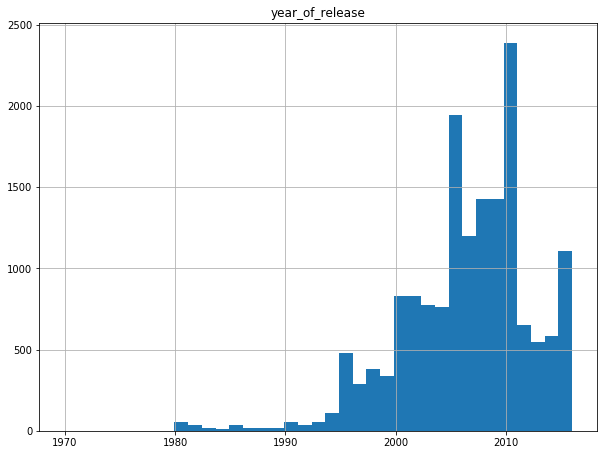

In [21]:
# answering the question above with a histogram
game_data.hist('year_of_release',bins=37, figsize=(10,7.5), range = (1970, 2016))

Looking at the histogram, we can see that till the beginning of 2000 there were not as much releases as there was after 2000.
Besides that the number of releases before 2000 were not significant, It is also way too far in the past to be of any relevance to our purpose. Therefore, from now on, we are going to be working with a new dataframe, a more relevant dataframe that includes only releases from 2013. (We chose 2013 because we consider anything older than 3 years irrelevant to the research)

In [22]:
new_game_data = game_data.query('year_of_release >= 2013')
new_game_data['year_of_release'].min()

2013.0

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment v1</b> 
    
I would like to draw your attention to the fact that for the purpose of forecasting game sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, it is completely dangerous to take too long a time interval - otherwise old and unnecessary trends will definitely come across.

Could we change the time period for research (for example, take the last year) and check if the conclusions have changed?
    
</div>

<div class="alert alert-block alert-info">
<b>Student's comment v1</b> 
    
Wow, really? I didn't know about that. I actually thought 10 years wasn't even enough but then thought that anything more than 10 years is really irrelevant in this case. Turns out to be that even 10 years is too much, thanks for the tip!
    
    (CORRECTED)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> 
    
Yep!
      
    
For example, a few years ago, one of the most popular genres was a battle royale, and in a couple of years, it has become a very significant genre. However, it just as quickly lost ground. In this case, even months could be critical for business!
    
</div>

<div class="alert alert-block alert-info">
<b>Student's comment v1</b> 
    
Good example!
</div>

Other than **year_of_release**, we also need to check how each platform performed in general and then see the distribution of each platform per year. This way we can check which platforms are still relevant till this day (No platform can last forever, every platform will eventually halt and die, therefore we shouldn't consider data of dead or inactive platforms in our research). 

### Total  sales distribution by platform
Below we'll display the total sales by each platform to see which platforms had the most sales in the past 10 years:

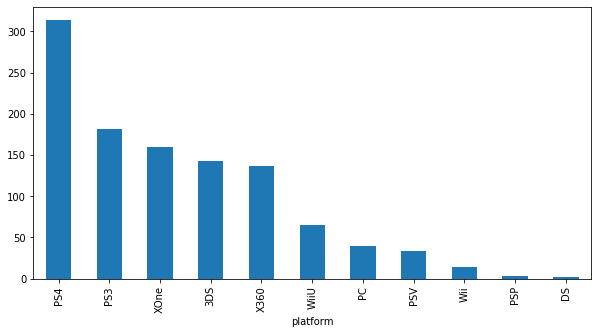

In [23]:
# group data by total sales and show in a plot
new_data_grouped = new_game_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
new_data_grouped.plot(kind='bar', figsize=(10,5))

We can clearly see that XOne, PS4 and PS3 had the most sales. Reaching over 150 USD while the rest lie below the 150M USD line.
But this doesn't mean that these platforms are the most relevant nowadays. To check that, we have to check the distribution for each platform per year, to see which platform had died and which is still going strong!

But first, lets choose only the most successful platforms (and their ascenders to compare between generations) to move forward with our research. They already have the most sales, lets check if they are still relevant to this day as well:

In [24]:
# Filtering the data to only include the 7 top platforms
new_game_data = new_game_data.query('platform == "PS4" or platform == "X360" or platform == "PS3" or platform == "XOne" or platform == "3Ds"')

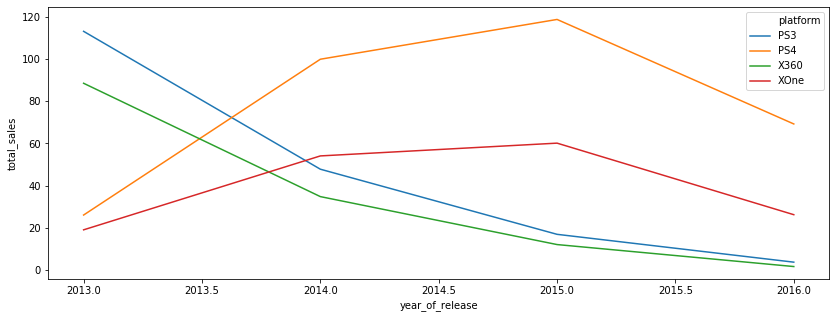

In [25]:
# displaying the distribution of top platforms per year
game_data_top_grouped = new_game_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
plt.figure(figsize=(14,5))
ax = sns.lineplot(data=game_data_top_grouped, x="year_of_release", y="total_sales", hue="platform")

Judging by the graph, despite that PS3 and X360 were second and forth in sales but nowadays these platforms are almost inactive/dead. While the first and third (PS4 and Xbox One) are actually still thriving and relevant!

Below we look at a graph that includes the current and previous generations of the most popular platforms, the purpose of the graph below is to calculate how much time does it take for a platform generation to appear and die for the next generation to come and replace it.

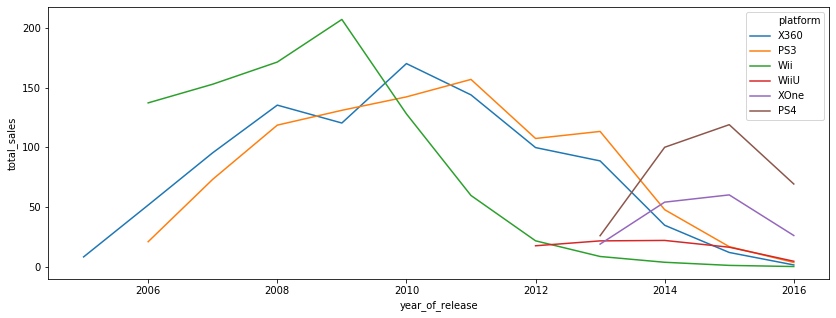

In [26]:
# displaying the distribution of each platform per year
game_data_grouped = game_data.query('(platform == "XOne" or platform == "X360" or platform == "PS3" or platform == "PS4" or platform == "Wii" or platform == "WiiU") and year_of_release > 0').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
plt.figure(figsize=(14,5))
ax = sns.lineplot(data=game_data_grouped, x="year_of_release", y="total_sales", hue="platform")

Looking at the graph above, we can see that new generations of platforms were released only after the old generations were dropping in popularity. For instance, lets take a look at PS3-PS4 (Orange, Brown), PS4 was only introduced after the popularity of the PS3 was dropping very low. Same with Xbox One and Xbox 360 (Purple, Blue) The Purple line (XOne) only started appearing when the blue line (X360) was dropping down in sales. Sames goes for Wii and WiiU. The 3 old generations were introduced in the years 2005-2006, peaked around the years 2008-2011, right after, their popularity started dropping which lead for the new generations to be introduced, in 2013, 7 years later.

Below we also have a boxplot that describes the global sales of all games broken down by platform. Is there any significant findings that can be found to add to everything we've found so far?

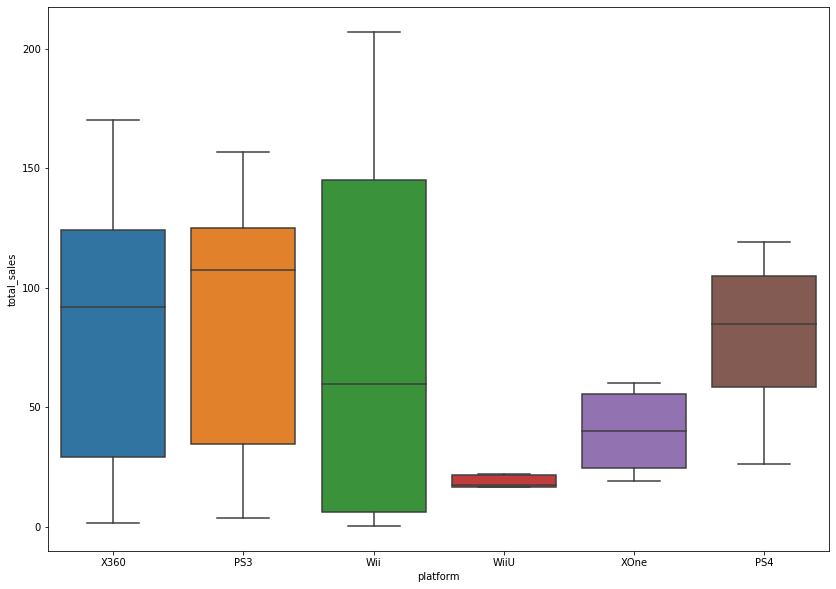

In [27]:
plt.figure(figsize=(14,10))
sns.boxplot (x='platform' ,y='total_sales' ,data=game_data_grouped, showfliers = False)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    

Great charts!
    
    
</div>

Looking at the plotbox of th 4 most popular platforms, we can learn a couple things. First, we can learn how PS4 had the most sales, by a long distance, than all the other platforms. This can be explained by the relatively high median, Q1 and Q3, meaning up to 50% of the data for this platform were of high values.

Next we see that both PS3 and X360 had relatively low medians but they had quite alot of outliers of high values that contributed to their high total sales.

**To sum up:**

Most games were released/highest sales happened after 2000, and due to the irrelevance of the far past to our research, we filtered our data to only include data from 2013 and beyond. Investigating those years, we found out that PS3 and X360 had the most sales during 2008 to 2013 until new generations, XOne and PS4 were released and took over the old generations.
We also found out that PS4 had high global sales due to having too many titles with relatively high sales while the X360 and PS3 success was due to outliers, titles with abnormally high sales, that contributed to the high total sales of this platform.

### User and critic ratings impact on sales

Does the user and critic reviews and scores have an impact on the total sales of a platform? or maybe on a specific genre?
Did the user and critic reviews affect the sales at all? Lets check this by looking at the scatterplot of the PS3 total sales below:

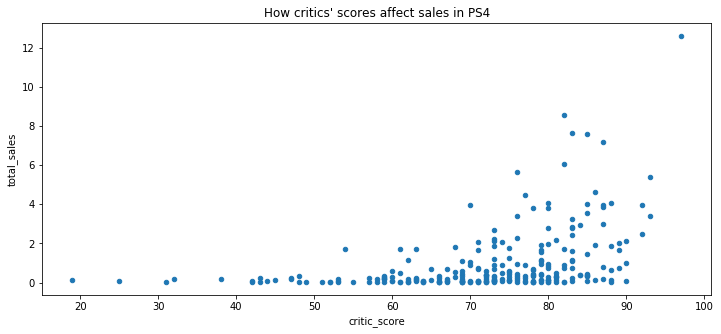

In [28]:
# checkings correlation between critic score to total sales of ps4 EXCULDING rows with -1 as a score
ps4_data = new_game_data.query('platform == "PS4" and critic_score > -1 and user_score > -1')
ps4_data.plot.scatter(x = 'critic_score' , y = 'total_sales', figsize = (12,5))
plt.title('How critics\' scores affect sales in PS4')
plt.show()

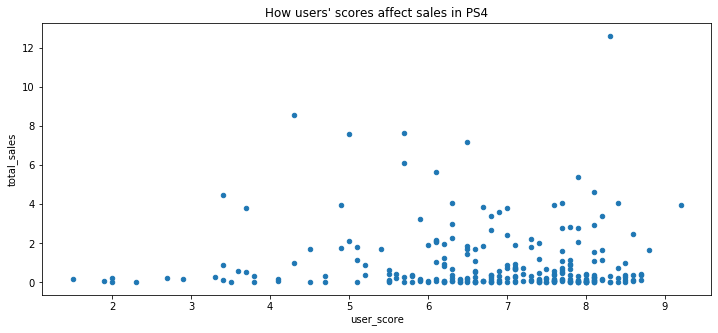

In [29]:
# checkings correlation between user score to total sales of ps4
ps4_data.plot.scatter(x = 'user_score' , y = 'total_sales', figsize = (12,5))
plt.title('How users\' scores affect sales in PS4')
plt.show()

In [30]:
ps4_data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.261760,-0.191355,-0.122830,-0.232177,-0.019983,0.150315,-0.234400
na_sales,-0.261760,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.893807
eu_sales,-0.191355,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.951656
jp_sales,-0.122830,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.592214
other_sales,-0.232177,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.997798
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,0.150315,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,-0.033625
total_sales,-0.234400,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,1.000000


It is very obvious from the graph that total sales don't have a relation with **critic_score** and **user_score**. We can see that titles with really low scores of both users and critics weren't really popular but once we start talking about the high scores of users and critics, we can only see dots scattered everywhere without a real relation.

This conclusion can be also confirmed by the correlation matrix, if we look at the correlation between **critic_scores**, **user_scores** and **total_sales** we can see that the correlation between them is weak.

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment v1</b> 
    
We wouldn't say that there is a strong relationship between total sales and critic scores. Rather weak. To verify this, could we build a similar graph for other platforms?

We could read more about correlation and its meaning here:
    
https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c

</div>

<div class="alert alert-block alert-info">
<b>Student's comment</b> 
    
I really appreciate the link that you sent! I updated the code above and the conclusions respectively!
    
    (CORRECTED)

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b> 
    
Glad to help!

</div>

### Total sales by Genre

Just like any other factor that we already investigated, genres can also have an impact on the sales of regions or the total sales in general.  We can check if there's actually an impact on total sales by genre in the table below:

,genre,total_sales
5,Puzzle,0.06
11,Strategy,1.93
9,Simulation,3.52
4,Platform,14.09
1,Adventure,15.26
2,Fighting,19.70
6,Racing,31.46
3,Misc,36.47
7,Role-Playing,60.46
10,Sports,140.66


([<matplotlib.patches.Wedge at 0x7f4854548ad0>,
 [Text(2.199999937643086, 0.0005238037975819671, 'Puzzle'),
  Text(2.1999272073726104, 0.017896431536746013, 'Strategy'),
  Text(2.1990257451946844, 0.0654658076476944, 'Simulation'),
  Text(2.1890877035088363, 0.21884932338577054, 'Platform'),
  Text(2.1488263402677017, 0.47174713499046855, 'Adventure'),
  Text(2.0629465908386524, 0.7643633712751955, 'Fighting'),
  Text(1.8664682152946408, 1.164601391590633, 'Racing'),
  Text(1.4889238188990557, 1.6196005252885828, 'Misc'),
  Text(0.7724208998221006, 2.0599431918181668, 'Role-Playing'),
  Text(-0.9357537893325133, 1.9910712809314093, 'Sports'),
  Text(-2.1115763864973065, -0.6174505356601276, 'Shooter'),
  Text(1.1892727908355292, -1.850845814480037, 'Action')],
 [Text(1.1999999659871377, 0.0002857111623174366, '0.0%'),
  Text(1.1999602949305146, 0.009761689929134187, '0.2%'),
  Text(1.1994685882880094, 0.03570862235328785, '0.4%'),
  Text(1.194047838277547, 0.11937235821042028, '1.8%'),

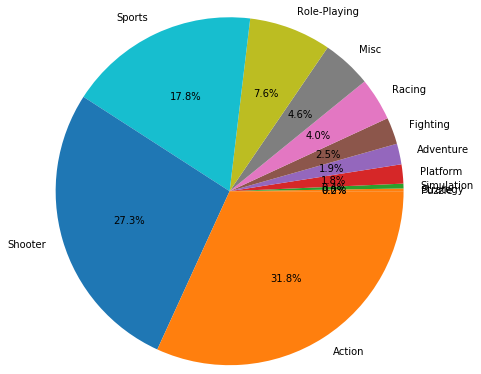

In [31]:
# grouping data by genre
game_data_grouped_genre_sales = new_game_data.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales')
display(game_data_grouped_genre_sales)
plt.pie(data = game_data_grouped_genre_sales, x = 'total_sales', labels = 'genre', radius = 2, autopct='%1.1f%%')

**Shooter, Sports and Action** were the genres with most sales, meaning they are the most profitable genres. While **Puzzle and Strategy** had the lest sales among all genres. This can be very reasonable, because Sports, Action and Shooter games are all games that doesn't require much thinking, it is very immersive and can be very far from our reality, all these factors could be the contributer to them being very popular and very profitable. Users play video-games to get seperated from their reality, from their jobs and from having to think and solve problems, those genres can offer them this. While on the other hand, Puzzle and strategy games require alot of thinking and focusing, something that you wouldn't want to do after a long day at work.

**To sum up:**

Video-games' total sales is not very dependent on the user and critic reviews. One factor that has a high impact on the total sales of video-games is genre. Appearently, some genres are much more profitable and successful than other genres, meaning; The video-game genre can be a determiner if your game will succeed or not.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Good research!

</div>

## Create a user profile for each region

To further expand our investigation, we are going to see how **platform**, **genre** and **rating** actually affect the regional sales, not just the total sales. To see if those factors had more impact one certain regions that others.

We'll start by investigating the impact of **platform** on **na_sales, eu_sales and jp_sales**. Did the same platforms take the crown of sales in all regions? Or did different regions have different popular platforms. Lets look below:

,platform,na_sales
2,PS3,22.05
0,3DS,22.64
8,X360,28.30
9,XOne,81.27
3,PS4,98.61


([<matplotlib.patches.Wedge at 0x7f4854309090>,
 [Text(1.0589826734528085, 0.29758309314667497, 'PS3'),
  Text(0.7430442675681009, 0.8111012368589907, '3DS'),
  Text(0.11941111009447548, 1.0934994223985697, 'X360'),
  Text(-1.044746920678182, 0.3442439131392979, 'XOne'),
  Text(0.3727312349548137, -1.0349258072388858, 'PS4')],
 [Text(0.5776269127924409, 0.16231805080727724, '8.7%'),
  Text(0.40529687321896407, 0.44241885646854034, '9.0%'),
  Text(0.0651333327788048, 0.5964542303992197, '11.2%'),
  Text(-0.5698619567335538, 0.18776940716688975, '32.1%'),
  Text(0.20330794633898927, -0.564504985766665, '39.0%')])

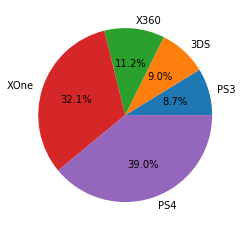

In [32]:
# grouping na sales by platform
game_data = game_data.query('year_of_release > 2013')
games_grouped_plat_na = game_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales').tail()
display(games_grouped_plat_na)
plt.pie(data = games_grouped_plat_na, x = 'na_sales', labels = 'platform', autopct='%1.1f%%')

,platform,eu_sales
0,3DS,16.12
1,PC,17.97
2,PS3,25.54
9,XOne,46.25
3,PS4,130.04


([<matplotlib.patches.Wedge at 0x7f48542ea0d0>,
 [Text(1.0747538711017366, 0.234316274620078, '3DS'),
  Text(0.8631498721434543, 0.6818887726152548, 'PC'),
  Text(0.3489332088773114, 1.0431901148604614, 'PS3'),
  Text(-0.6508934057469342, 0.8867568857105971, 'XOne'),
  Text(-0.17618544519562176, -1.085798641047787, 'PS4')],
 [Text(0.5862293842373109, 0.12780887706549707, '6.8%'),
  Text(0.47080902116915685, 0.3719393305174117, '7.6%'),
  Text(0.19032720484216983, 0.5690127899238879, '10.8%'),
  Text(-0.355032766771055, 0.483685574023962, '19.6%'),
  Text(-0.09610115192488458, -0.5922538042078836, '55.1%')])

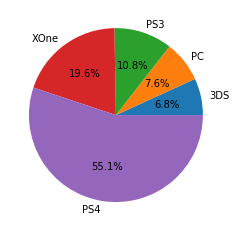

In [33]:
# grouping eu sales by platform
games_grouped_plat_eu = game_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales').tail()
display(games_grouped_plat_eu)
plt.pie(data = games_grouped_plat_eu, x = 'eu_sales', labels = 'platform', autopct='%1.1f%%')

,platform,jp_sales
7,WiiU,7.31
2,PS3,11.22
5,PSV,14.54
3,PS4,15.02
0,3DS,44.24


([<matplotlib.patches.Wedge at 0x7f485424c410>,
 [Text(1.066149013495395, 0.2707882586501792, 'WiiU'),
  Text(0.7015239550132736, 0.8472686354058757, 'PS3'),
  Text(-0.20226507256332274, 1.0812441169416618, 'PSV'),
  Text(-1.021503700060579, 0.40808110806866227, 'PS4'),
  Text(0.07199784108215065, -1.0976412487144922, '3DS')],
 [Text(0.5815358255429427, 0.14770268653646138, '7.9%'),
  Text(0.3826494300072401, 0.46214652840320486, '12.2%'),
  Text(-0.11032640321635785, 0.5897695183318155, '15.7%'),
  Text(-0.5571838363966793, 0.2225896953101794, '16.3%'),
  Text(0.03927154968117308, -0.5987134083897229, '47.9%')])

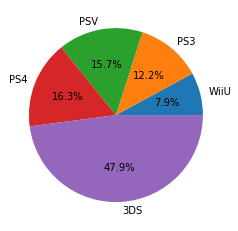

In [34]:
# grouping jp sales by platform
games_grouped_plat_jp = game_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales').tail()
display(games_grouped_plat_jp)
plt.pie(data = games_grouped_plat_jp, x = 'jp_sales', labels = 'platform', autopct='%1.1f%%')

Considering the high popularity of the top platforms globally, we'd expect them to be the top platforms regionally as well. Although some of them appear in the top platforms for each region, but not all of them appear as the top platforms in all regions. For instance, North America's sales look very similar for the global sales but when we look at the Japan sales, we can see that the distribution is a bit different, with 3DS as the top platform, followed by PS4 and PSV. Although we didn't expect that, but this can be very reasonable. PS4, Wii, 3Ds are are japanese products, therefore it is reasonable to be among the top platforms in Japan.

**Next** we move on to see if there's a relation between genres and regional sales:

,genre,na_sales
3,Misc,15.05
7,Role-Playing,33.47
10,Sports,46.13
0,Action,72.53
8,Shooter,79.02


([<matplotlib.patches.Wedge at 0x7f48541ad750>,
 [Text(1.0797779937629626, 0.20995114713959437, 'Misc'),
  Text(0.7575123473127244, 0.7976058197310038, 'Role-Playing'),
  Text(-0.27864053710877923, 1.0641237949974294, 'Sports'),
  Text(-1.0781945550035719, -0.2179369210589382, 'Action'),
  Text(0.5866101210464515, -0.9305313352519988, 'Shooter')],
 [Text(0.5889698147797977, 0.11451880753068783, '6.1%'),
  Text(0.41318855307966784, 0.43505771985327474, '13.6%'),
  Text(-0.15198574751387958, 0.5804311609076888, '18.7%'),
  Text(-0.5881061209110391, -0.11887468421396627, '29.5%'),
  Text(0.319969156934428, -0.5075625465010902, '32.1%')])

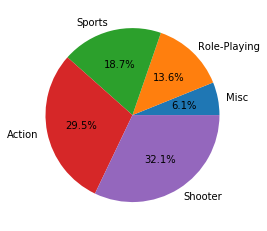

In [35]:
games_grouped_gnre_na = game_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales').tail()
display(games_grouped_gnre_na)
plt.pie(data = games_grouped_gnre_na, x = 'na_sales', labels = 'genre', autopct='%1.1f%%')

,genre,eu_sales
6,Racing,14.13
7,Role-Playing,28.17
10,Sports,45.73
8,Shooter,65.52
0,Action,74.68


([<matplotlib.patches.Wedge at 0x7f485418e9d0>,
 [Text(1.079258897490935, 0.21260346231106367, 'Racing'),
  Text(0.7845067511961606, 0.7710701377486003, 'Role-Playing'),
  Text(-0.24348659499256806, 1.07271351164182, 'Sports'),
  Text(-1.0814792802644457, -0.20100389637690247, 'Shooter'),
  Text(0.5682118876787337, -0.9418785753485267, 'Action')],
 [Text(0.5886866713586917, 0.11596552489694381, '6.2%'),
  Text(0.42791277337972394, 0.4205837114992365, '12.3%'),
  Text(-0.13281086999594618, 0.5851164608955381, '20.0%'),
  Text(-0.5898977892351521, -0.10963848893285588, '28.7%'),
  Text(0.3099337569156729, -0.5137519501901054, '32.7%')])

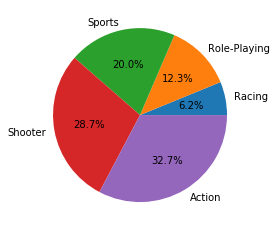

In [36]:
games_grouped_gnre_eu = game_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales').tail()
display(games_grouped_gnre_eu)
plt.pie(data = games_grouped_gnre_eu, x = 'eu_sales', labels = 'genre', autopct='%1.1f%%')

,genre,jp_sales
8,Shooter,4.87
3,Misc,5.61
2,Fighting,6.37
0,Action,29.58
7,Role-Playing,31.16


([<matplotlib.patches.Wedge at 0x7f48540efc50>,
 [Text(1.0786842195164292, 0.21550024261293094, 'Shooter'),
  Text(0.8942961483712487, 0.6404954324648614, 'Misc'),
  Text(0.4924920234924133, 0.9835911786897789, 'Fighting'),
  Text(-0.9204662657980959, 0.6022805438727948, 'Action'),
  Text(0.33466210533115015, -1.0478555603017634, 'Role-Playing')],
 [Text(0.588373210645325, 0.11754558687978049, '6.3%'),
  Text(0.48779789911159016, 0.3493611449808334, '7.2%'),
  Text(0.2686320128140436, 0.5365042792853338, '8.2%'),
  Text(-0.5020725086171431, 0.3285166602942517, '38.1%'),
  Text(0.18254296654426372, -0.5715575783464163, '40.2%')])

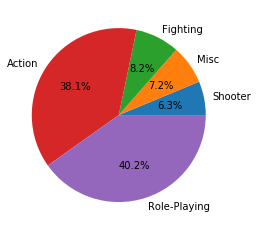

In [37]:
games_grouped_gnre_jp = game_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales').tail()
display(games_grouped_gnre_jp)
plt.pie(data = games_grouped_gnre_jp, x = 'jp_sales', labels = 'genre', autopct='%1.1f%%')

Just like results in the **platform** part, similarly here we see that the same genres sat at the top for the different regions. We can see that **shooter, sports and action**, the top 3 genres of the global sales, appear also on the regional sales as most profitable. Other than those 3 genres, we can see **Role-playinng**, **Racing** and **Misc** among the top 5 as well. For Japan and North America we have **RP and Misc** and for EU we have **Misc and Racing** and this slight difference could be due to the cultural differences of these regions. Again, we don't see anything special, the same genres that dominated global sales, are also dominating the regional sales, implying that regions doesn't really have a big impact on the popularity of a genre.

Finally, we check if there's a relation between ESRB ratings and regional sales:

,rating,jp_sales
1,E10+,4.46
2,M,8.01
0,E,8.94
3,T,14.78


([<matplotlib.patches.Wedge at 0x7f48540de450>,
 [Text(1.0185814677260552, 0.41532131368981734, 'E10+'),
  Text(0.11105522588118688, 1.0943796127507488, 'M'),
  Text(-1.07795790129192, 0.21910445692025443, 'E'),
  Text(0.3121957320726713, -1.054767189893395, 'T')],
 [Text(0.555589891486939, 0.22653889837626398, '12.3%'),
  Text(0.06057557775337465, 0.596934334227681, '22.1%'),
  Text(-0.5879770370683199, 0.1195115219565024, '24.7%'),
  Text(0.17028858113054796, -0.5753275581236699, '40.8%')])

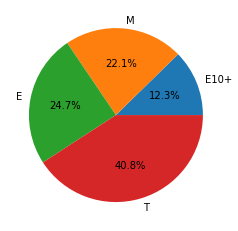

In [38]:
games_grouped_rate_jp = game_data.query('rating != "N/A"').groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales').sort_values(by='jp_sales').tail()
display(games_grouped_rate_jp)
plt.pie(data = games_grouped_rate_jp, x = 'jp_sales', labels = 'rating', autopct='%1.1f%%')

,rating,eu_sales
1,E10+,26.16
3,T,34.07
0,E,58.06
2,M,93.44


([<matplotlib.patches.Wedge at 0x7f4853e0ce90>,
 [Text(1.018169825887484, 0.4163294436528006, 'E10+'),
  Text(0.3134562078436083, 1.0543932879928175, 'T'),
  Text(-0.9691330152148051, 0.5203664082362162, 'E'),
  Text(0.20164761723381816, -1.0813594399939013, 'M')],
 [Text(0.5553653595749912, 0.22708878744698213, '12.4%'),
  Text(0.17097611336924085, 0.5751236116324459, '16.1%'),
  Text(-0.5286180082989845, 0.2838362226742997, '27.4%'),
  Text(0.10998960940026443, -0.5898324218148552, '44.1%')])

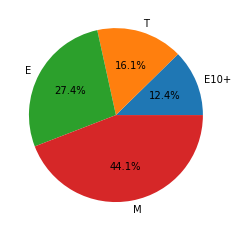

In [39]:
games_grouped_rate_eu = game_data.query('rating != "N/A"').groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales').sort_values(by='eu_sales').tail()
display(games_grouped_rate_eu)
plt.pie(data = games_grouped_rate_eu, x = 'eu_sales', labels = 'rating', autopct='%1.1f%%')

,rating,na_sales
1,E10+,33.23
3,T,38.95
0,E,50.74
2,M,96.42


([<matplotlib.patches.Wedge at 0x7f4853def810>,
 [Text(0.9777430534257524, 0.5040025014597511, 'E10+'),
  Text(0.06707559743759202, 1.0979530337079042, 'T'),
  Text(-1.0343665997311269, 0.3742802925090592, 'E'),
  Text(0.20750605664868402, -1.0802505433713576, 'M')],
 [Text(0.5333143927776831, 0.2749104553416824, '15.1%'),
  Text(0.03658668951141383, 0.5988834729315841, '17.8%'),
  Text(-0.5641999634897056, 0.2041528868231232, '23.1%'),
  Text(0.11318512180837309, -0.5892275691116495, '44.0%')])

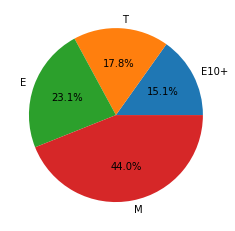

In [40]:
games_grouped_rate_na = game_data.query('rating != "N/A"').groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales').sort_values(by='na_sales').tail()
display(games_grouped_rate_na)
plt.pie(data = games_grouped_rate_na, x = 'na_sales', labels = 'rating', autopct='%1.1f%%')

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment v1</b> 
        
Could we display this data as a percentage in a pie chart? This will make it much easier to take in information.

</div>

<div class="alert alert-block alert-info">
<b>Student's comment v1</b> 

Nice idea! Here we go! (It really helped realize the differences between each category, I didn't look at them this way before)
    
    (CORRECTED)
</div>
    
<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2</b> 
        
We could make these graphs even a little better and more informative! Like, we could display percentages on them.

</div>
<div class="alert alert-block alert-info">    
<b>Student's comment v1</b> 

Yep!
    
    (CORRECTED)
</div>
<div class="alert alert-block alert-success">
<b>Reviewer's comment v3</b> 
        
Now we know exactly the percentage of each part of the pie-chart!

</div>

Judging by the tables above, ESRT ratings doesn't have an impact on the regional sales. We can see that the same ESRB ratings are the top 3 on the 3 regions meaning that an ESRB rating popularity and sales aren't affected by the region and their popularity is just universal and not related to the region.

**To sum up:**

In this part of the research, we checked whether several factors have an impact on regional sales. Factors like **platform**, **genre** and **rating** could have an impact on the region. It is very reasonable to be this way because every region has its own culture, life-style and rules, so we would expect that different regions might have different popular platforms or different genres as their top 5. After we completed the research, we found out that this isn't quite true, and the platforms, genres and ESRB ratings that performed the best universally, are the same platforms, genres and ESRB ratings that performed best regionally with slight unsignificant changes here and there. Meaning, there was no relation or impact by region on those factors.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
        
It's great to write detailed conclusions for each section!

</div>

## Testing hypotheses

First hypotheses:

**null hypotheses**: Average user ratings of the **Xbox One** and **PC** platforms are the same.

**alt. hypotheses**: Average user ratings of the **Xbox One** and **PC** platforms are different.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
        
Perfect hypothesis description!

</div>

In [41]:
# we start our test with a levene test to check variance similarity
xone_data = new_game_data.query('platform == "XOne"')
pc_data = game_data.query('platform == "PC"') # Pc doesn't exist on our new DF new_game_data
st.levene(xone_data['user_score'], pc_data['user_score'], center = 'mean')

LeveneResult(statistic=3.9583403408117968, pvalue=0.04732708903766419)

In [42]:
# The pvalue of the levene test was small therefore we'll perform the test with 'equal_var' param as False
alpha = 0.05 #  if the p-value is less than alpha, we reject the hypothesis

result = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], equal_var = False) 

print('p-value: ', result.pvalue)
if (result.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.30851317821001123
We can't reject the null hypothesis


The null hypotheses cannot be rejected, therefore most probably the average user ratings of the Xbox One and PC platforms are the same, unless we get more data that can prove this hypotheses wrong.

Second hypotheses:

**null hypotheses**: Average user ratings for the **Action** and **Sports** genres are the same.

**alt. hypotheses**: Average user ratings for the **Action** and **Sports** genres are different.

In [43]:
# we start our test with a levene test to check variance similarity
action_data = new_game_data.query('genre == "Action"')
sport_data = new_game_data.query('genre == "Sports"')
st.levene(action_data['user_score'], sport_data['user_score'], center = 'mean')

LeveneResult(statistic=108.75819526312337, pvalue=2.0851718560350313e-23)

In [44]:
# The pvalue of the levene test was very small therefore we'll perform the test with 'equal_var' param as False
alpha = 0.05 #  if the p-value is less than alpha, we reject the hypothesis

result = st.ttest_ind(action_data['user_score'], sport_data['user_score'], equal_var = False) 

print('p-value: ', result.pvalue)
if (result.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.3013656999140455
We can't reject the null hypothesis


The null hypotheses was rejected, meaning that the alt. hypothese should be accepted and the average user ratings for the Action and Sports genres are actually different.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
        
Great job with hypothesis testing!

</div>

## General Conclusion

(1) We started our research by preprocessing the data that we had, just like in any normal research, to make sure that our data is clean enough to be evaluated and studied. We have checked the unique values for each of the columns, to check if there are any strange/irrelevant values that shouldn't exist, we switched the column names and video-game names to lower-case and we dealt with all the missing values, duplicates (there wasn't any) and possibily incorrect values. By now, we have a clean dataframe that is ready for further studying and analyzing.

(2) After we were done with the data preprocessing part, we were ready to start our investigation. We start our investigation by checking correlations between the total sales and year of release. Most games were released/highest sales happened after 2000, and due to the irrelevance of the far past to our research, we filtered our data to only include data from 2013 and beyond. Investigating those years, we found out that PS4, XOne, X360 and PS3 had the most sales during 2013 to 2016. We also found out that PS3 and X360 had high global sales due to having too many titles with relatively high sales while the Wii success was due to outliers, titles with abnormally high sales, that contributed to the high total sales of this platform.

(3) We finished our first investigation of total sales and year of release and moved on to investigate the impact of user and critic reviews on the success of a title. Video-games' total sales is not dependant on the user and critic reviews, some games that had bad reviews didn't sell alot but some actually did well, even better than games with very good reviews. Also when it came to *good* reviews, there was still no dependance or relation between the critics' and users' reviews and the sales of the games.

(4) Finally, we had to investigate not only global sales, but also regional sales. There's always a high possibility to miss a significant factor of great impact just because we are looking at the bigger picture, total sales. Therefore, we started investigating the impact of the several factors on regional sales. Factors like platform, genre and rating could have an impact on the region. It is very reasonable to be this way because every region has its own culture, life-style and rules, so we would expect that different regions might have different popular platforms or different genres as their top 5. After we completed the research, we found out that this isn't quite true, and the platforms, genres and ESRB ratings that performed the best universally, are the same platforms, genres and ESRB ratings that performed best regionally with slight unsignificant changes here and there. Meaning, there was no relation or impact by region on those factors.

(5) Finally, after all the investigations that we have performed, we can safely say that there are some factors that impact the total sales of a title. Those factors are **platform**, **genre** and **critic and user reviews**. We found out that certain **genres** have a higher chance of success than other, due to users being more interested in such genres. We also found out that the video-game's availability on each of the most popular **platforms** can really be impactful to the title, not having it available on all of the popular platforms might reduce the sales of the title by alot. Finally, **critic** and **user** reviews turned out to be a determining factor when it comes to sales, and if you wish to have a successful game title, you have to make sure to meet the demands of the critics and the users, otherwise they will destroy you with their reviews, making your title's survival chances drop to the ground!

So if you're a developer going to release a title in the upcomin year or a store owner that looks to have the most profits out of selling video-games, then you might want to pay more attention to these factors and you just might become very successful!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
This is one of the most detailed conclusion I've seen. Amazing!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b> 
    
Please pay attention to the conclusions, they may change after the changes above.

</div>

<div class="alert alert-block alert-info">
<b>Student's comment v1</b> 

Yep, changed all conclusions that were related to changed that you suggested!
    
    (CORRECTED)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 
    
Awesome job!

</div>

<b> The overall review conclusion v1 </b>
    
Ameer, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done (especially the conclusions). However, there are red comments in the work, which means **the project needs to be improved**.  
I would like to list the main issues:  

<div class="alert alert-block alert-danger">
<s>- Correlation conclusion. <br>
- Time period. <br>
- New Сharts. <br>
- Yellow comments. <br>
    
</div>  

I would also like to note the positive aspects of the project:  
<div class="alert alert-block alert-success">
- Using different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!   <br>
- You project is well-structured and orginized, it was a pleasure for me to review it! <br>
- Сuriosity and excellent description of actions and conclusions!
</div>  

I'm sure that you will be able to improve everything in time! If a comment seems unclear, feel free to ask any question.  
Have a nice day!

<div class="alert alert-block alert-info">
<b>Student's comment v1</b> 
    
Thanks for all the tips! 
    Have a nice day too!
</div>

<b> The overall review conclusion v2 </b>
    
Ameer, thank you for taking the time to correct your project! I'm really glad to see that the part regarding **charts and analysis** is much improved! However, this other part with **the missing values preprocessing in users score and critic score** needs a bit more work. Could you take a second glance at it? 
    
When you get a moment, shoot back a second round of corrections, and I'll take a look to make sure everything is perfect.

Keep working, you've got this!
Have a nice day!

<div class="alert alert-block alert-info">
<b>Student's comment v1</b> 
    
Thanks for the review, Alex!
* I added percentages for missing values, changed the critics and users reviews to a stub and filtered them later in the analysis part when that was needed, same with the rating column!   
* For the the missing values with small percentages, I dropped them as adviced!
* I also added percentages for the cakes (pies :D), they look more informative now!
    
I hope everything is alright now and I wish you a good day, or night :D, ahead!
</div>

<b> The overall review conclusion v3 </b>
    
Ameer, your project has been accepted and you can go to the next sprint! 
    
I'm impressed with your hard work, dedication, and speed at completing tasks. Nothing can stop you!
    
Congratulations!
</div>